In [3]:
## importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import tensorflow as tf
from tensorflow import keras

In [4]:
## Loading the dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

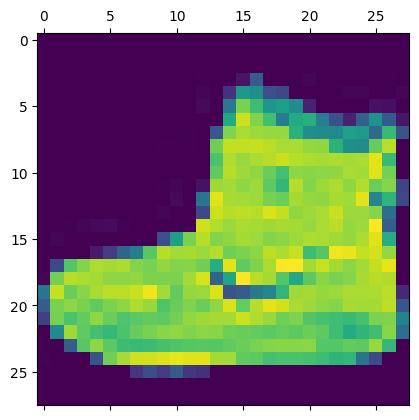

In [9]:
plt.matshow(X_train[0])

In [10]:
## scaling of the data set

X_train = X_train/255
X_test = X_test/255

In [14]:
### Model Building

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])



In [17]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [24]:
model.fit(X_test,y_test,epochs = 50)

Epoch 1/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0111 - accuracy: 0.9976
Epoch 2/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0170 - accuracy: 0.9948
Epoch 3/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0242 - accuracy: 0.9926
Epoch 4/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0366 - accuracy: 0.9885
Epoch 5/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0292 - accuracy: 0.9931
Epoch 6/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0128 - accuracy: 0.9971
Epoch 7/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0258 - accuracy: 0.9919
Epoch 8/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0511 - accuracy: 0.9821
Epoch 9/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0073 - accuracy: 0.9989
Epoch 10/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0060 - accuracy: 0.9990

In [26]:
## model evaluation
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0029 - accuracy: 0.9993


[0.0029384461231529713, 0.9993000030517578]

In [28]:
y_predict = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [29]:
y_predict[0]

array([1.00962134e-14, 3.36314706e-19, 6.70817681e-04, 7.58136932e-19,
       2.85545479e-14, 4.58932459e-01, 2.22899321e-11, 9.21575129e-01,
       6.24261487e-09, 9.99836802e-01], dtype=float32)

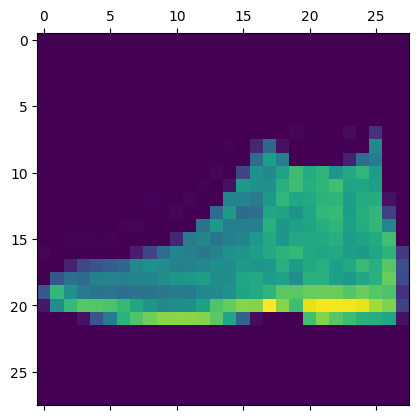

In [30]:
plt.matshow(X_test[0])

In [31]:
np.argmax(y_predict[0])

9

In [32]:
y_predicted_labels = [np.argmax(i) for i in y_predict]

In [33]:
y_predicted_labels[:5]

[9, 2, 1, 1, 6]

In [35]:
# confusion matrix

cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)

In [36]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1000,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  993,    7,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1000,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   2,    0,    0,    0,    0,    0,  998,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1000,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0,  999,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1000]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'actual')

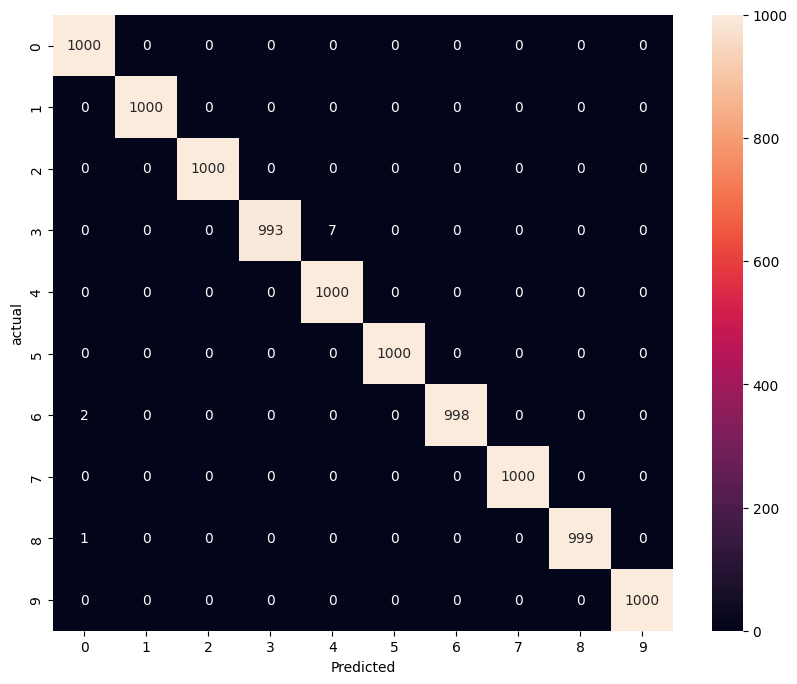

In [37]:
plt.figure(figsize = (10,8))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('actual')